# Gender Classifier

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os
import datetime
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from sklearn.utils import shuffle
import time

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
RAVDESS = "Data/RAVDESS/audio_speech_actors_01-24/"
TESS = "Data/TESS/"

EMOTIONS = {
    0: 'angry',
    1: 'calm',
    2: 'disgust',
    3: 'fear',
    4: 'happy',
    5: 'sad',
    6: 'surprise'
}

In [3]:
RAVDESS_folder_names = os.listdir(RAVDESS)
RAVDESS_folder_names.sort()

file_emotions = []
file_gender = []
file_intensity = []
file_paths = []
labels = []
RAV_EMOTIONS = {
    1: 'calm',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
}
for i in RAVDESS_folder_names:
    if os.path.isdir(RAVDESS + i):
        file_names = os.listdir(RAVDESS + i)

        for file in file_names:
            parts = file.split('.')[0].split('-')
            file_emotions.append(RAV_EMOTIONS[int(parts[2])])
            # file_intensity.append(int(parts[3]))
            if int(parts[6]) % 2 == 0:
                file_gender.append('female')
                labels.append(0)
            else:
                file_gender.append('male')
                labels.append(1)

            file_paths.append(RAVDESS + i + '/' + file)

for file in os.listdir(TESS):
    parts = file.split('.')[0].split('_')
    if parts[2] == 'ps':
        parts[2] = 'surprise'
    elif parts[2] == 'neutral':
        parts[2] = 'calm'
    file_emotions.append(parts[2])
    if parts[0] == 'OAF':
        file_gender.append('male')
        labels.append(1)
    else:
        file_gender.append('female')
        labels.append(0)

    file_paths.append(TESS + file)

# print(file_emotions, file_gender, file_intensity, file_paths, sep="\n")

In [4]:
dataset = pd.DataFrame({
    'path': file_paths,
    'gender': file_gender,
    'emotion': file_emotions,
    'label': labels
})
# dataset['emotion'] = dataset['emotion'].map(EMOTIONS)
print('Shape=>', dataset.shape)
dataset["emotion"] = dataset["emotion"]
dataset.head(50)

Shape=> (4240, 4)


path gender   emotion  label
0   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
1   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
2   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry      1
3   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear      1
4   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear      1
5   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry      1
6   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1
7   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad      1
8   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad      1
9   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1
10  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy      1
11  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy      1
12  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
13  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
14  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
15  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy      1
16  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy      1
17  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
18  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
19  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
20  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
21  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
22  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear      1
23  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry      1
24  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry      1
25  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear      1
26  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad      1
27  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1
28  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1
29  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad      1
30  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
31  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
32  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm      1
33  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy      1
34  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy      1
35  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
36  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
37  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1
38  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad      1
39  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad      1
40  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1
41  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry      1
42  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear      1
43  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear      1
44  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry      1
45  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
46  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise      1
47  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad      1
48  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1
49  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust      1

In [5]:
dataset = shuffle(dataset)
# dataset = shuffle(dataset)

In [6]:
dataset.tail(10)

path  gender   emotion  \
2314                       Data/TESS/OAF_germ_angry.wav    male     angry   
3492                         Data/TESS/YAF_merge_ps.wav  female  surprise   
792   Data/RAVDESS/audio_speech_actors_01-24/Actor_1...  female      calm   
2695                         Data/TESS/OAF_time_sad.wav    male       sad   
269   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...    male     happy   
1306  Data/RAVDESS/audio_speech_actors_01-24/Actor_2...  female   disgust   
1683                     Data/TESS/YAF_bite_neutral.wav  female      calm   
3580                          Data/TESS/OAF_gun_sad.wav    male       sad   
744   Data/RAVDESS/audio_speech_actors_01-24/Actor_1...    male       sad   
215   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...  female      fear   

      label  
2314      1  
3492      0  
792       0  
2695      1  
269       1  
1306      0  
1683      0  
3580      1  
744       1  
215       0

# Exploratry Data Analysis (EDA)

In [7]:
dataset['gender'].value_counts()

male      2120
female    2120
Name: gender, dtype: int64

In [8]:
dataset['label'].value_counts()

1    2120
0    2120
Name: label, dtype: int64

In [9]:
dataset['emotion'].value_counts()

calm        688
sad         592
surprise    592
disgust     592
happy       592
fear        592
angry       592
Name: emotion, dtype: int64

In [10]:
dataset['emotion'].value_counts(normalize=True) * 100

calm        16.226415
sad         13.962264
surprise    13.962264
disgust     13.962264
happy       13.962264
fear        13.962264
angry       13.962264
Name: emotion, dtype: float64

<AxesSubplot:>

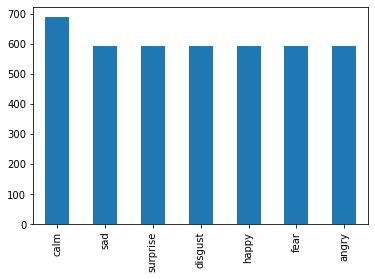

In [11]:
dataset.emotion.value_counts().plot.bar()

In [12]:
male_sample = []
female_sample = []
emotions_sample = []
for i in EMOTIONS.values():
    male_sample.append(dataset[dataset['emotion'] == i][
        dataset['gender'] == 'male']['path'].reset_index(drop=True)[0])
    female_sample.append(dataset[dataset['emotion'] == i][
        dataset['gender'] == 'female']['path'].reset_index(drop=True)[0])
    emotions_sample.append(
        dataset[dataset['emotion'] == i]['path'].reset_index(drop=True)[0])
print(male_sample)
print(female_sample)
emotions_sample

['Data/TESS/OAF_lot_angry.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_05/03-01-02-01-02-02-05.wav', 'Data/TESS/OAF_ring_disgust.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-01-01.wav', 'Data/TESS/OAF_ring_happy.wav', 'Data/TESS/OAF_note_sad.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-08-02-02-01-09.wav']
['Data/RAVDESS/audio_speech_actors_01-24/Actor_16/03-01-05-01-02-01-16.wav', 'Data/TESS/YAF_mill_neutral.wav', 'Data/TESS/YAF_pass_disgust.wav', 'Data/TESS/YAF_door_fear.wav', 'Data/TESS/YAF_lean_happy.wav', 'Data/TESS/YAF_mop_sad.wav', 'Data/TESS/YAF_lease_ps.wav']


/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_12130/3976703453.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_sample.append(dataset[dataset['emotion'] == i][
/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_12130/3976703453.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_sample.append(dataset[dataset['emotion'] == i][


['Data/RAVDESS/audio_speech_actors_01-24/Actor_16/03-01-05-01-02-01-16.wav',
 'Data/TESS/YAF_mill_neutral.wav',
 'Data/TESS/OAF_ring_disgust.wav',
 'Data/TESS/YAF_door_fear.wav',
 'Data/TESS/YAF_lean_happy.wav',
 'Data/TESS/OAF_note_sad.wav',
 'Data/TESS/YAF_lease_ps.wav']

In [13]:
for emotion, path in zip(EMOTIONS.values(), male_sample):
    signal, sr = librosa.load(path)
    print(f"Emotion:{emotion}")
    # Play the Audio
    ipd.display(ipd.Audio(signal, rate=sr))

Emotion:angry


Emotion:calm


Emotion:disgust


Emotion:fear


Emotion:happy


Emotion:sad


Emotion:surprise


In [14]:
for emotion, path in zip(EMOTIONS.values(), female_sample):
    signal, sr = librosa.load(path)
    print(f"Emotion:{emotion}")
    # Play the Audio
    ipd.display(ipd.Audio(signal, rate=sr))

Emotion:angry


Emotion:calm


Emotion:disgust


Emotion:fear


Emotion:happy


Emotion:sad


Emotion:surprise


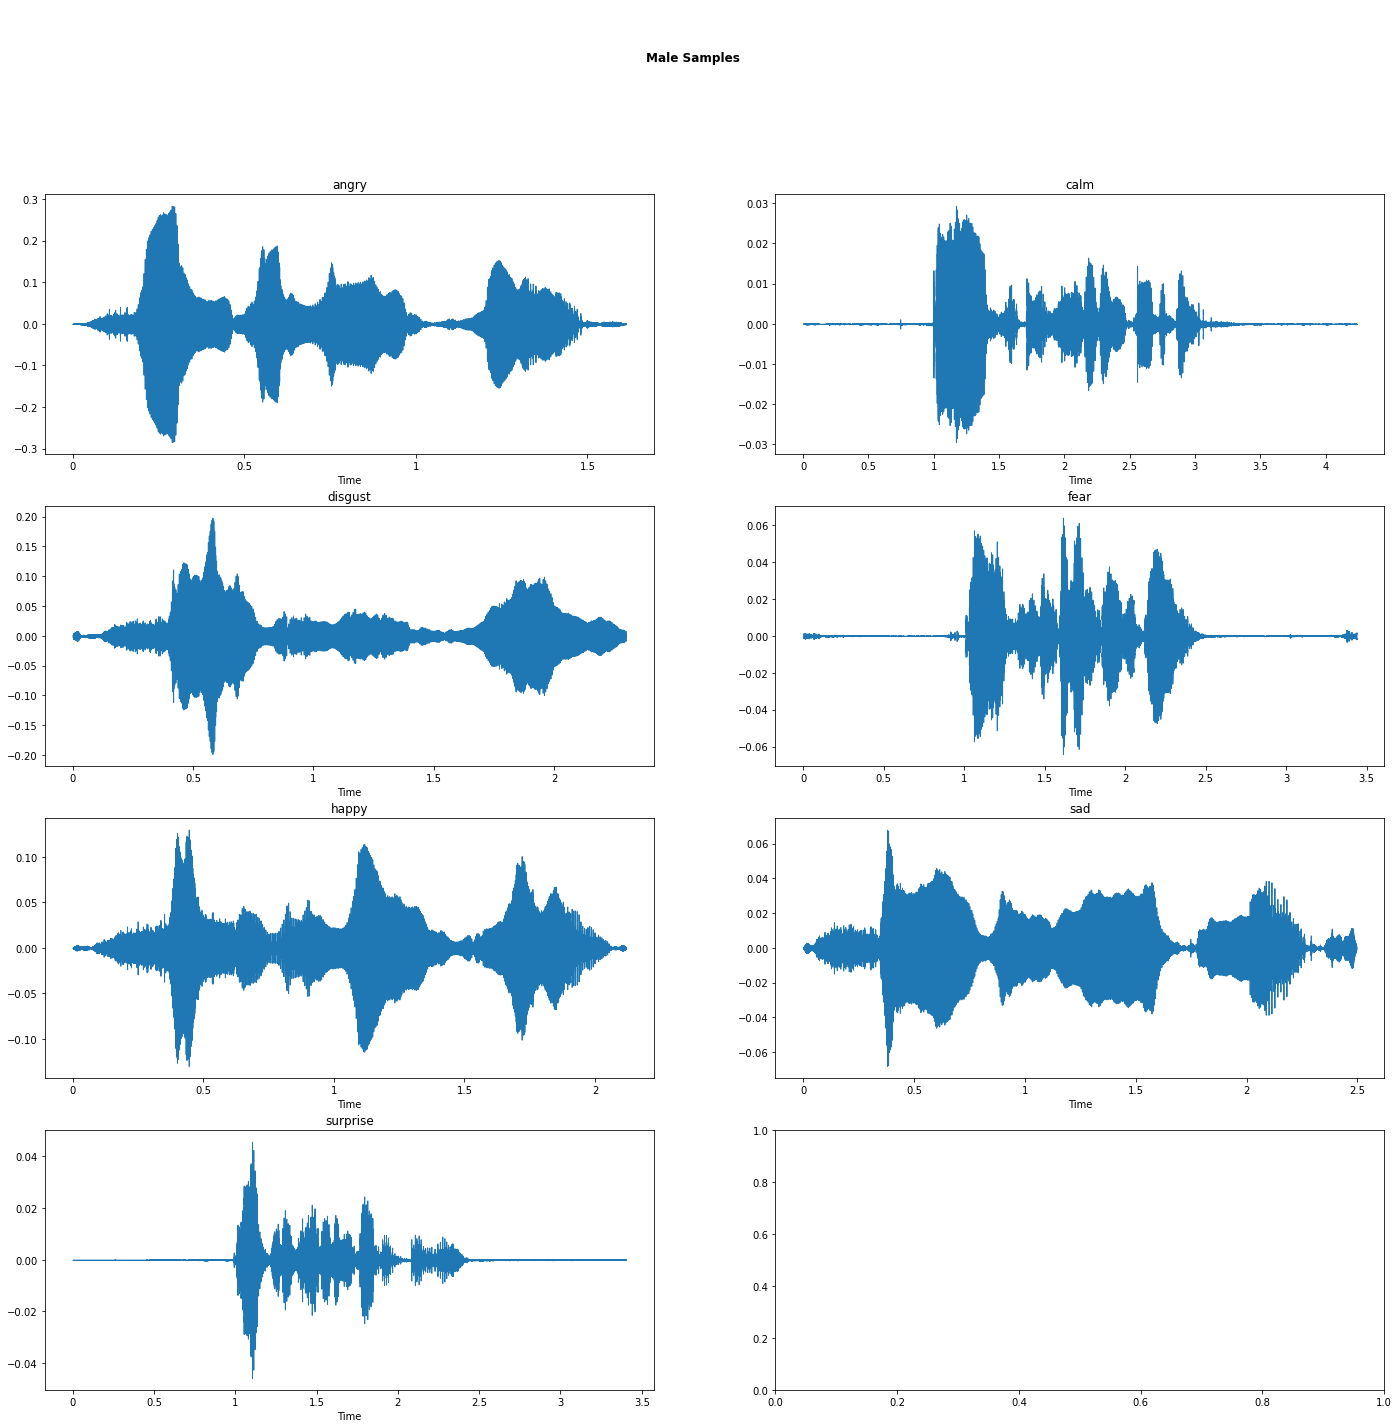

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(24, 22))
plt.suptitle("\n\n\nMale Samples", va='center', fontweight="bold")
for ax, emotion, path in zip(axes.flatten(), EMOTIONS.values(), male_sample):
    signal, sr = librosa.load(path)
    librosa.display.waveshow(signal, sr=sr, ax=ax)
    ax.set(title=emotion)

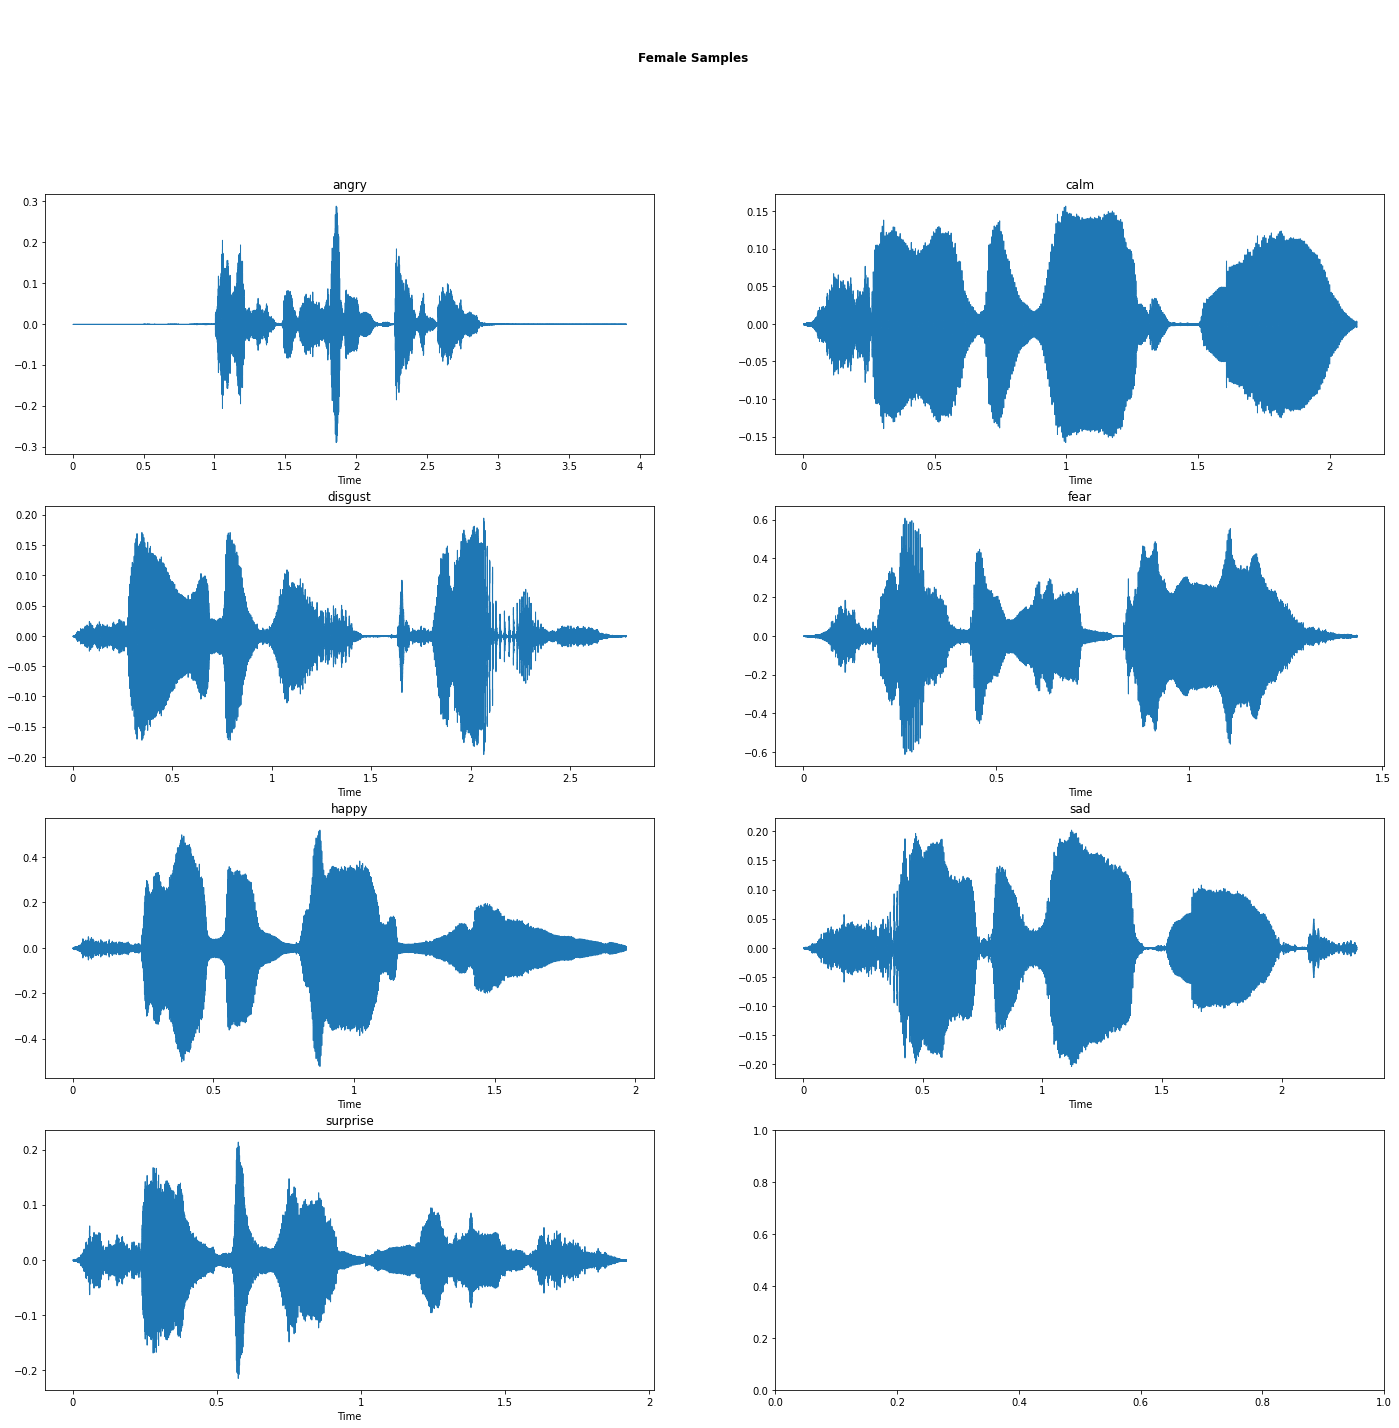

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(24, 22))
plt.suptitle("\n\n\nFemale Samples", va='center', fontweight="bold")
for ax, emotion, path in zip(axes.flatten(), EMOTIONS.values(), female_sample):
    signal, sr = librosa.load(path)
    librosa.display.waveshow(signal, sr=sr, ax=ax)
    ax.set(title=emotion)

# Preprocessing For Single File

In [17]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(16, 6))
    plt.title('{}'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_rmse(data, sr, e):
    rmse = librosa.feature.rms(y=data, frame_length=2048, hop_length=512)
    rmse = rmse[0]
    plt.figure(figsize=(16, 6))
    plt.title('Root Mean Square Energy - {}'.format(e), size=15)
    energy = np.array(
        [sum(abs(data[i:i + 2048]**2)) for i in range(0, len(data), 512)])
    frames = range(len(energy))
    t = librosa.frames_to_time(frames, sr=sr, hop_length=512)
    librosa.display.waveshow(data, sr=sr)
    plt.plot(t, energy / energy.max(), 'r--')  # normalized for visualization
    plt.plot(t[:len(rmse)], rmse / rmse.max(),
             color='g')  # normalized for visualization
    plt.legend(('Energy', 'RMSE'))


def create_melspectrogram(data, sr, e):
    # stft thực hiện biến đổi Fourier.
    X = librosa.feature.melspectrogram(y=data, sr=sr)

    plt.figure(figsize=(16, 6))
    plt.title('MelSpectrogram - {}'.format(e), size=15)
    librosa.display.specshow(X, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


def create_mfcc(data, sr, e):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    plt.figure(figsize=(16, 6))
    plt.title('Mel-frequency cepstral coefficient - {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

Sample Rate :  48000


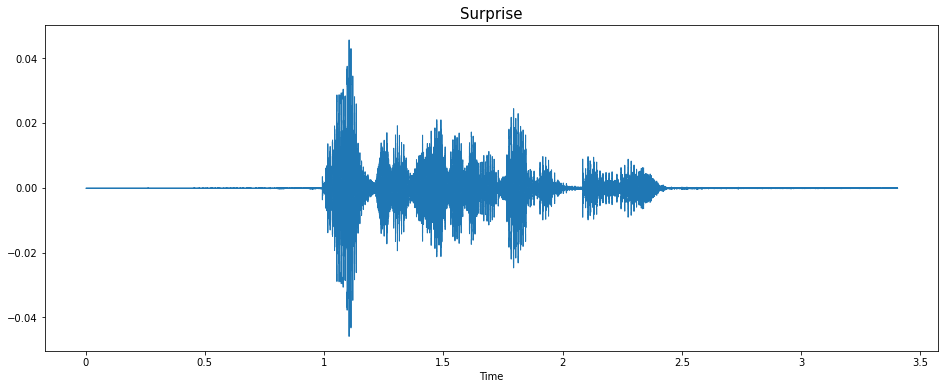

In [18]:
#Taking an audio file form male_sample to perform preprocessing to know the audio data more
path = male_sample[-1]

audio, sr = librosa.load(path, sr=None)
print("Sample Rate : ", sr)
create_waveplot(audio, sr, "Surprise")
ipd.display(ipd.Audio(audio, rate=sr))

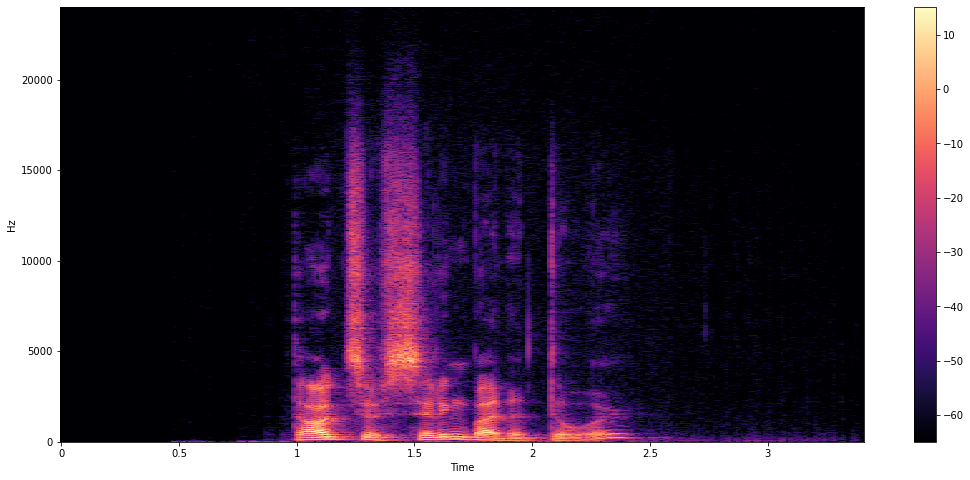

In [19]:
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

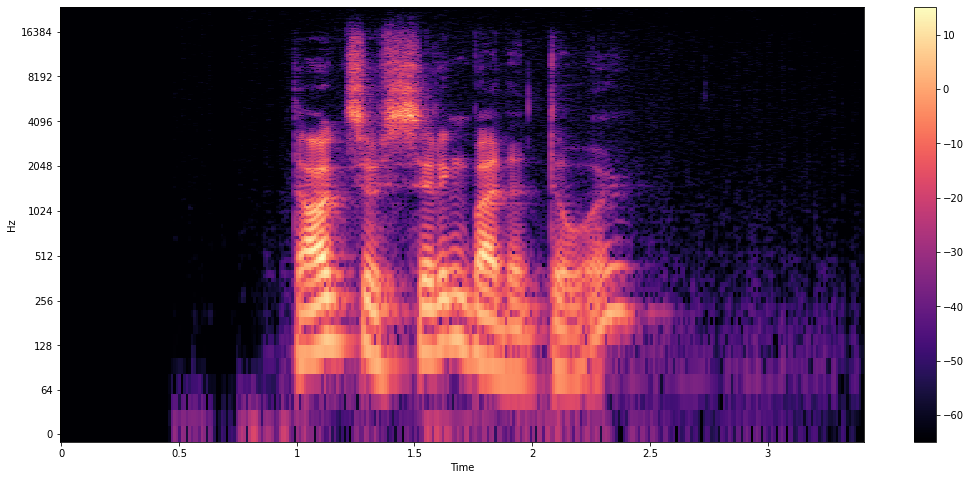

In [20]:
plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

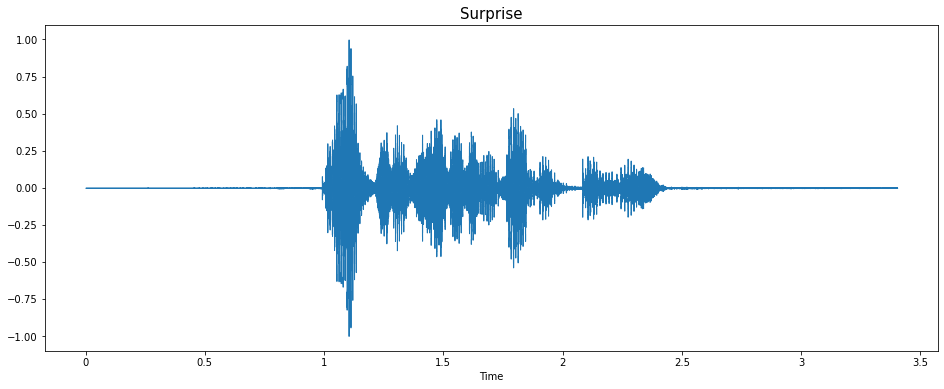

In [21]:
normalizedsound = librosa.util.normalize(audio)
create_waveplot(normalizedsound, sr, "Surprise")
ipd.display(ipd.Audio(normalizedsound, rate=sr))

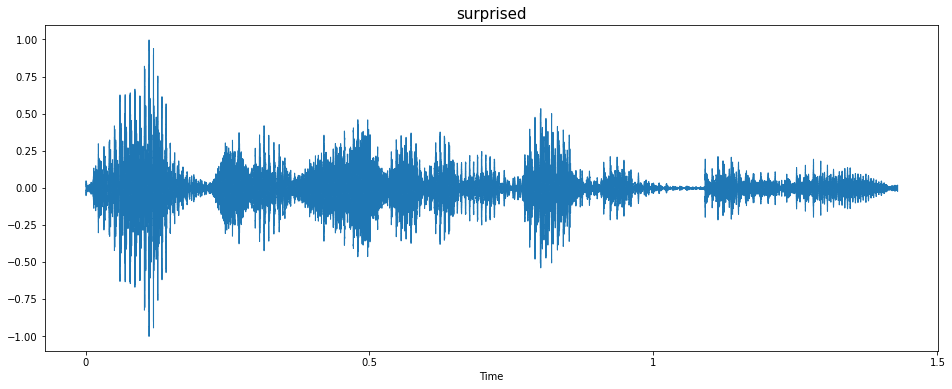

In [22]:
# Trimming the audio to remover silence before and after speech
trimmed_audio, index = librosa.effects.trim(normalizedsound, top_db=30)

create_waveplot(trimmed_audio, sr, "surprised")

ipd.display(ipd.Audio(data=trimmed_audio, rate=sr))

68608


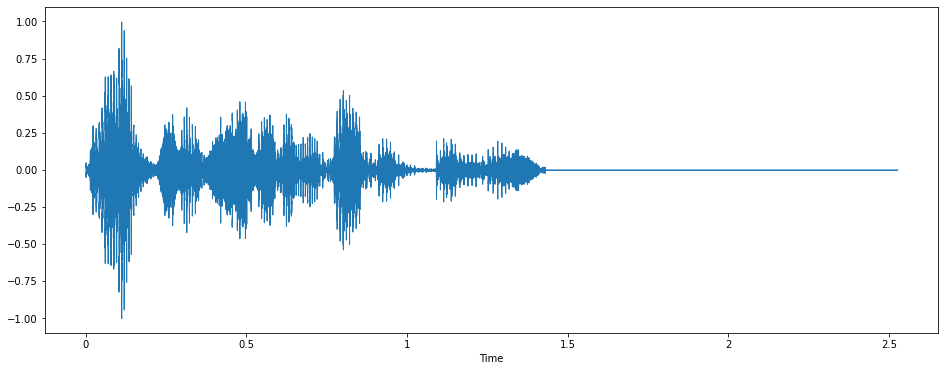

In [23]:
# Padding some values to right side to make all data length equal
# so we have maximum lenght audio file with 173056
print(len(trimmed_audio))
final_audio = np.pad(trimmed_audio, (0, 121212 - len(trimmed_audio)),
                     'constant')

create_waveplot(final_audio, sr, "")

ipd.display(ipd.Audio(data=final_audio, rate=sr))

In [24]:
def noise(data, noise_rate=0.018):
    noise_amp = noise_rate * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.6):
    return librosa.effects.time_stretch(y=data, rate=rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=2):
    return librosa.effects.pitch_shift(y=data,
                                       sr=sampling_rate,
                                       n_steps=pitch_factor)

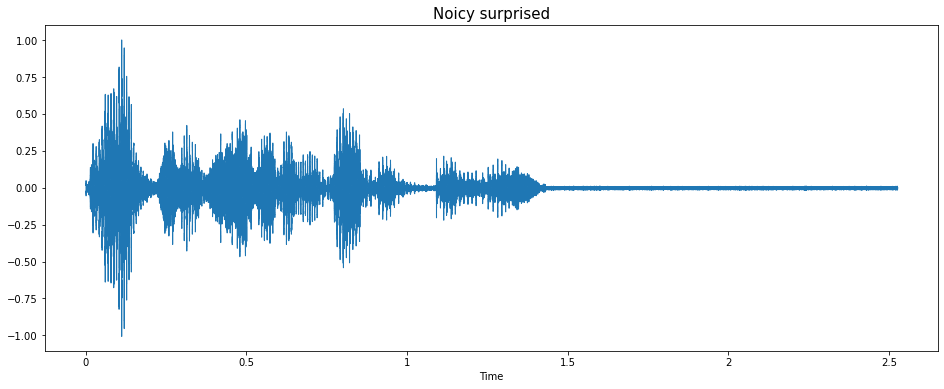

In [25]:
noisy_audio = noise(final_audio)
create_waveplot(noisy_audio, sr, "Noicy surprised")
ipd.display(ipd.Audio(data=noisy_audio, rate=sr))

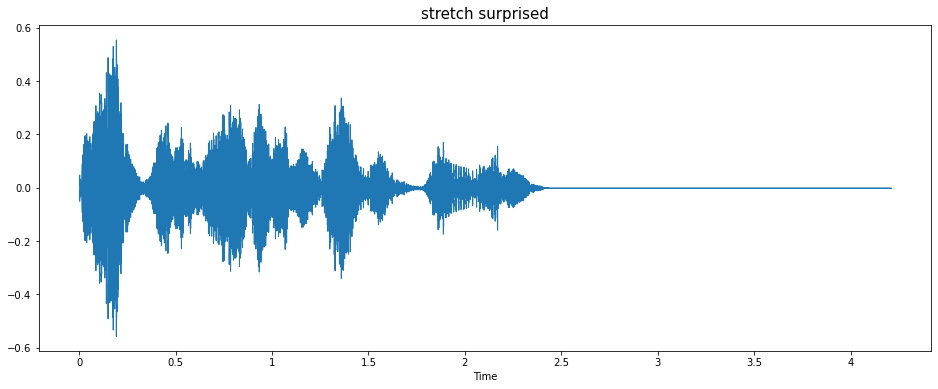

In [26]:
stretch_audio = stretch(final_audio)
create_waveplot(stretch_audio, sr, "stretch surprised")
ipd.display(ipd.Audio(data=stretch_audio, rate=sr))

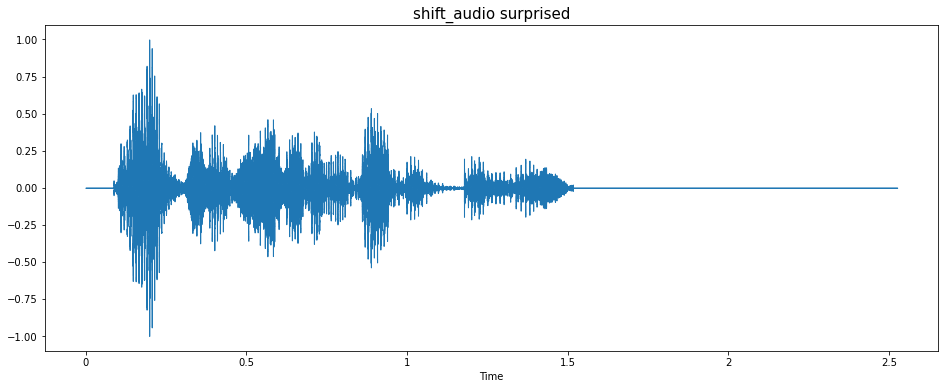

In [27]:
shift_audio = shift(final_audio)
create_waveplot(shift_audio, sr, "shift_audio surprised")
ipd.display(ipd.Audio(data=shift_audio, rate=sr))

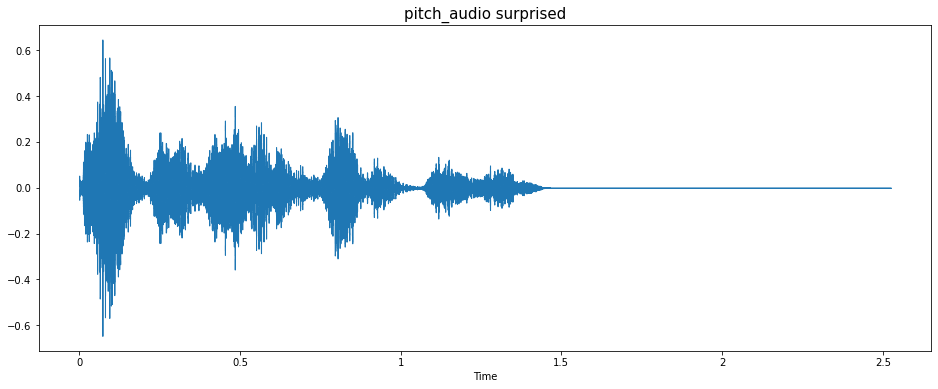

In [28]:
pitch_audio = pitch(final_audio, sr)
create_waveplot(pitch_audio, sr, "pitch_audio surprised")
ipd.display(ipd.Audio(data=pitch_audio, rate=sr))

# Feature Selection For Single File

In [29]:
emos = list(zip(EMOTIONS.values(), emotions_sample))

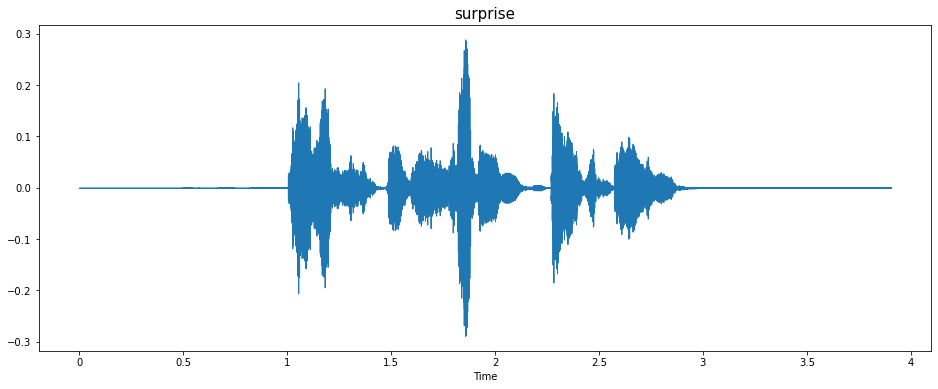

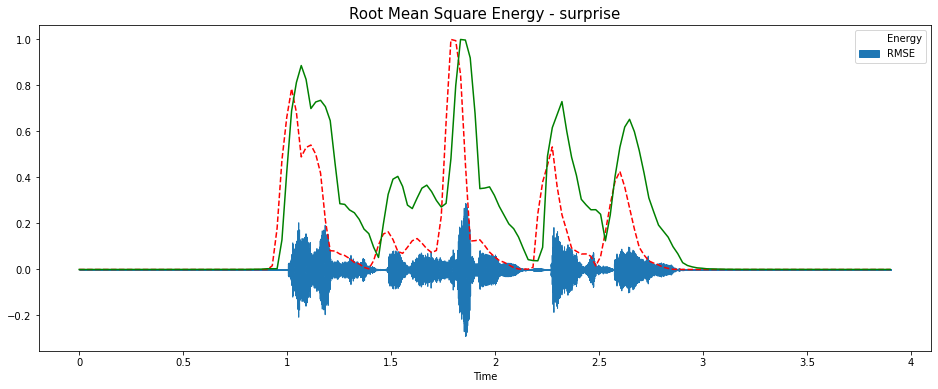

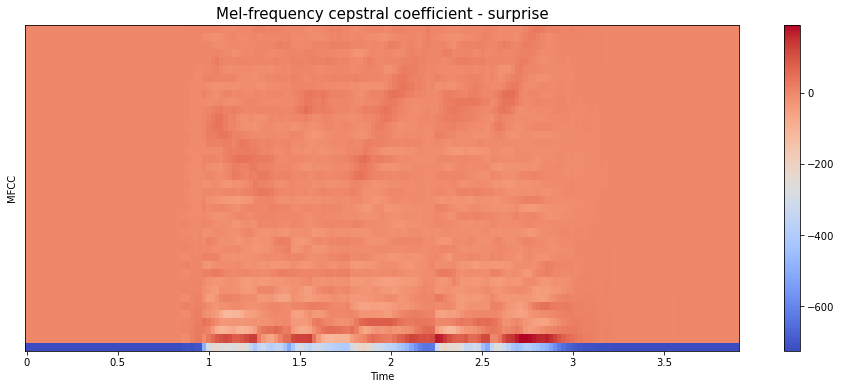

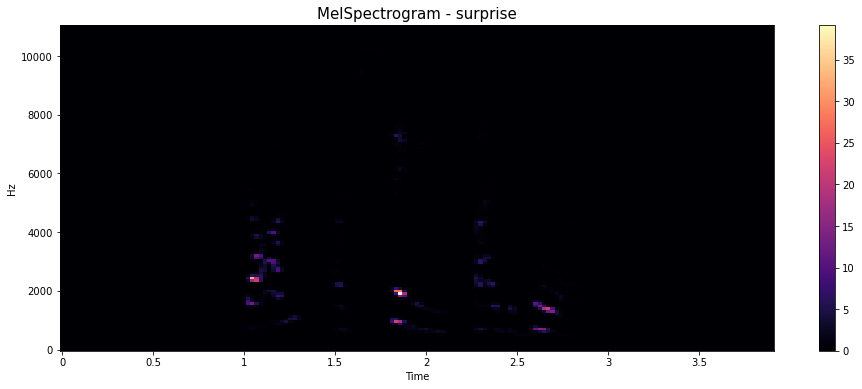

In [30]:
emotions, path = emos[0]
signal, sr = librosa.load(path)
ipd.display(ipd.Audio(data=signal, rate=sr))
create_waveplot(signal, sr, emotion)
create_rmse(signal, sr, emotion)
create_mfcc(signal, sr, emotion)
create_melspectrogram(signal, sr, emotion)

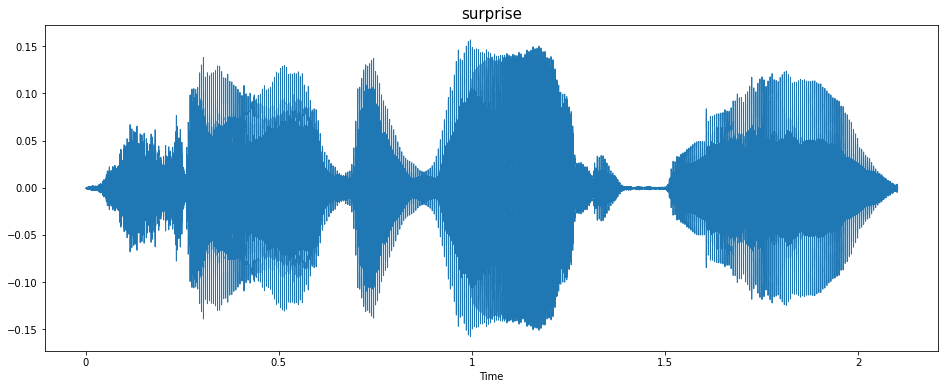

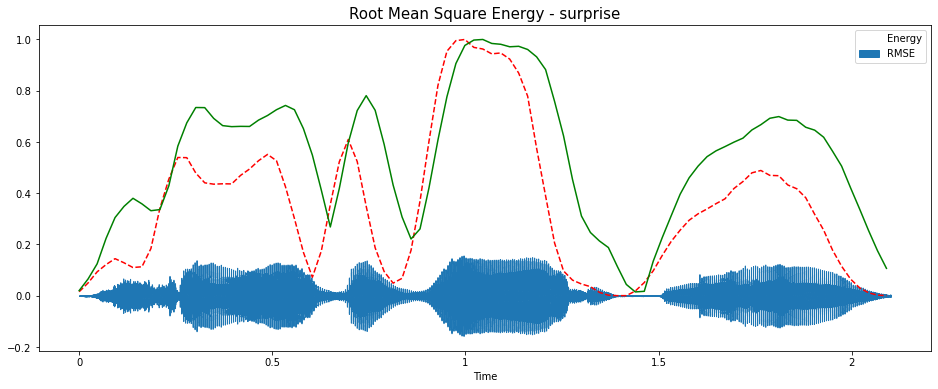

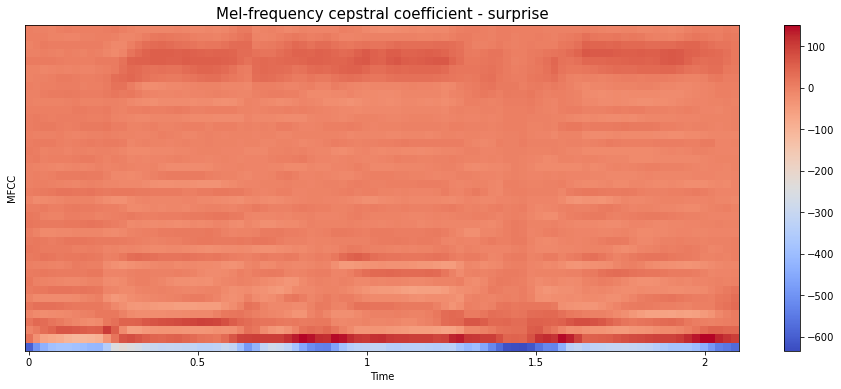

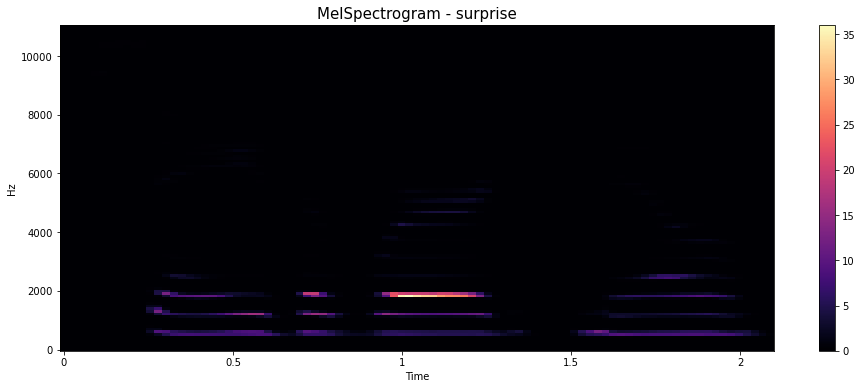

In [31]:
emotions, path = emos[1]
signal, sr = librosa.load(path)
ipd.display(ipd.Audio(data=signal, rate=sr))
create_waveplot(signal, sr, emotion)
create_rmse(signal, sr, emotion)
create_mfcc(signal, sr, emotion)
create_melspectrogram(signal, sr, emotion)

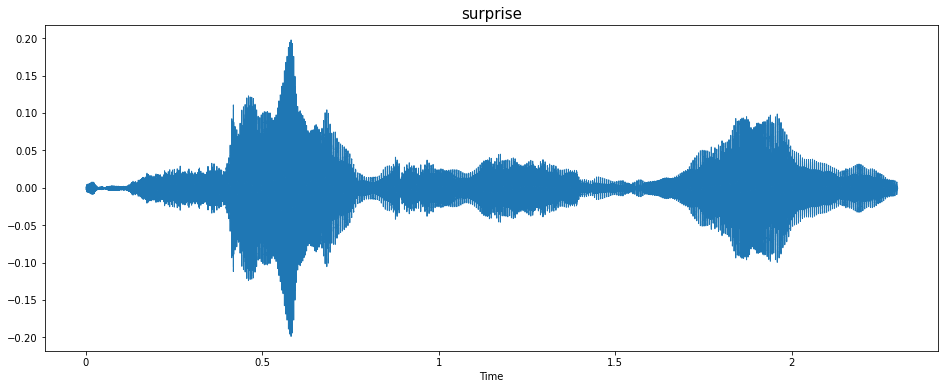

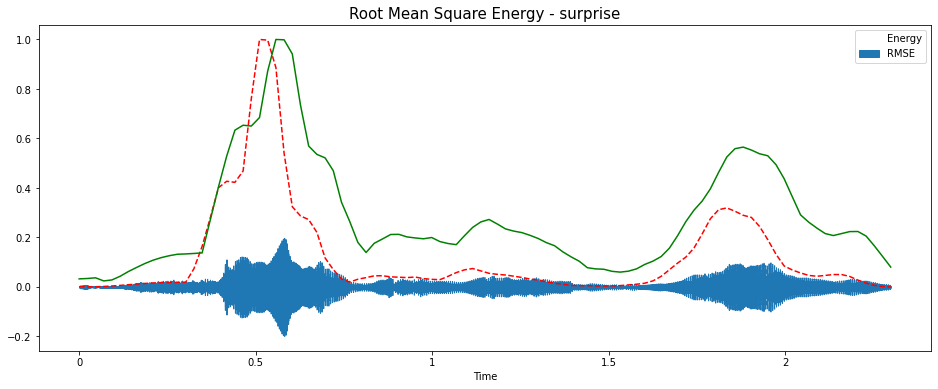

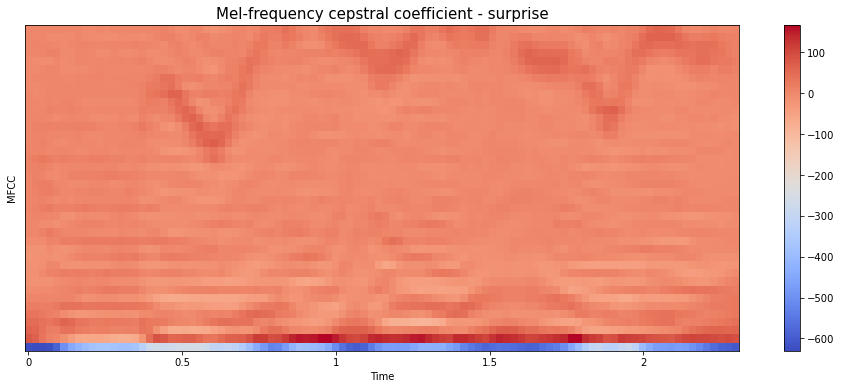

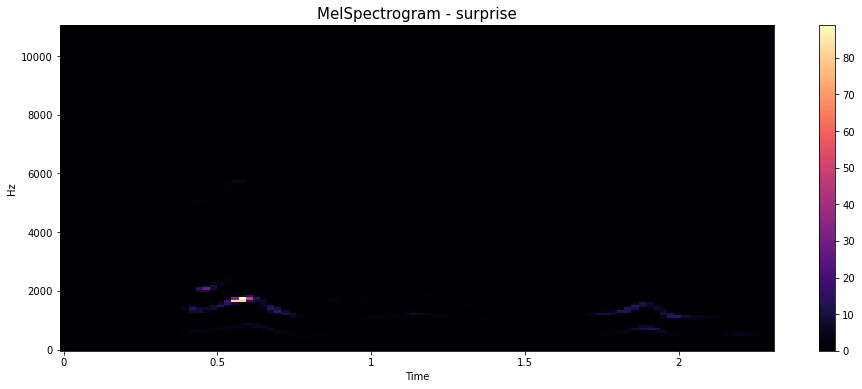

In [32]:
emotions, path = emos[2]
signal, sr = librosa.load(path)
ipd.display(ipd.Audio(data=signal, rate=sr))
create_waveplot(signal, sr, emotion)
create_rmse(signal, sr, emotion)
create_mfcc(signal, sr, emotion)
create_melspectrogram(signal, sr, emotion)

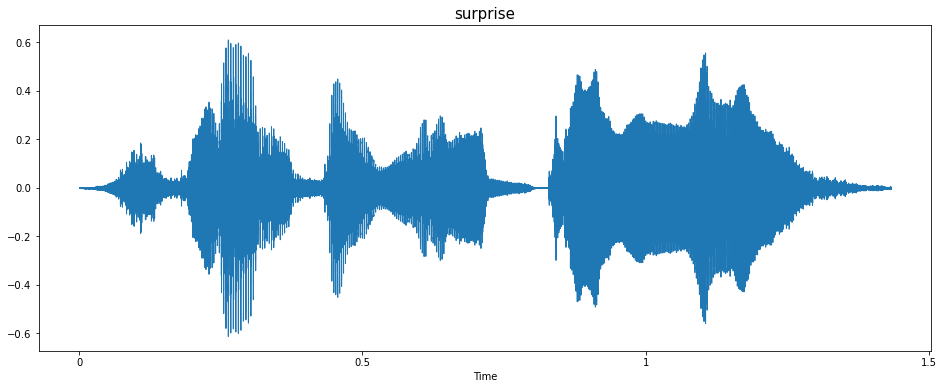

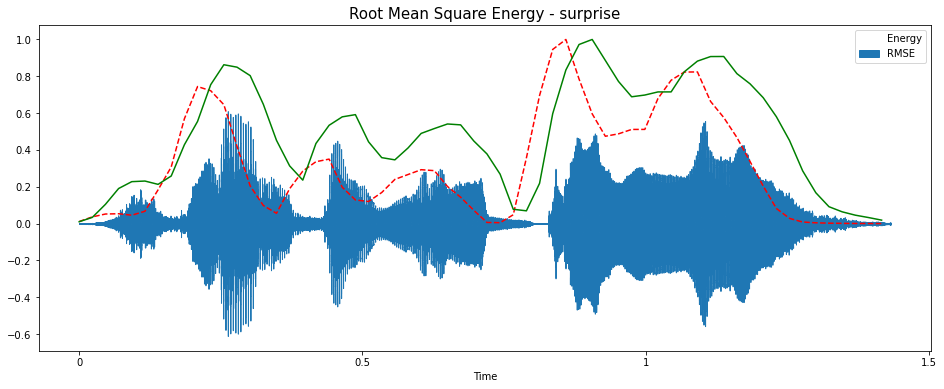

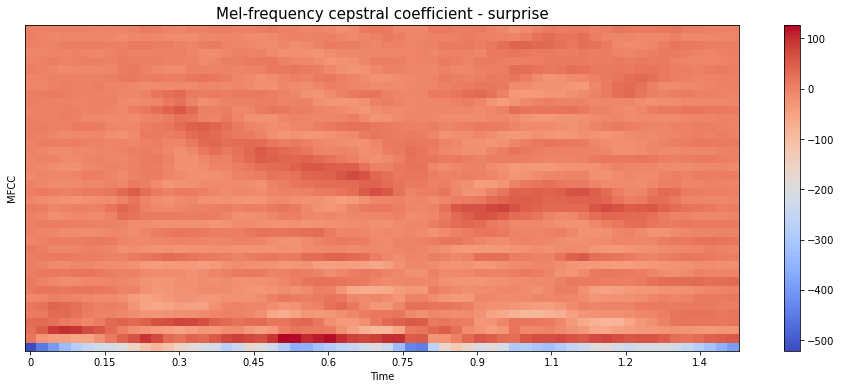

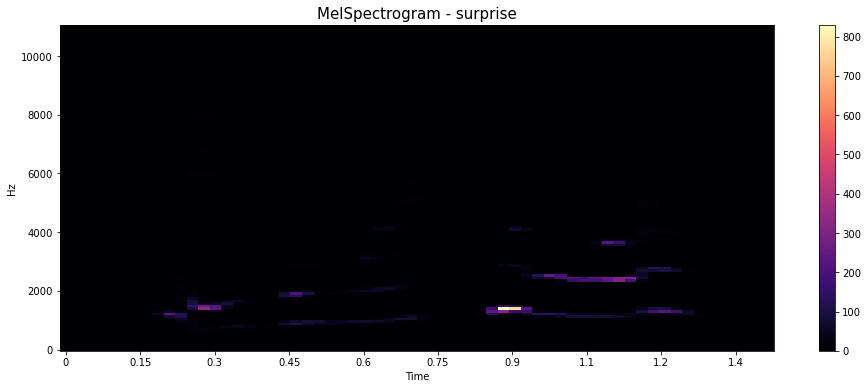

In [33]:
emotions, path = emos[3]
signal, sr = librosa.load(path)
ipd.display(ipd.Audio(data=signal, rate=sr))
create_waveplot(signal, sr, emotion)
create_rmse(signal, sr, emotion)
create_mfcc(signal, sr, emotion)
create_melspectrogram(signal, sr, emotion)

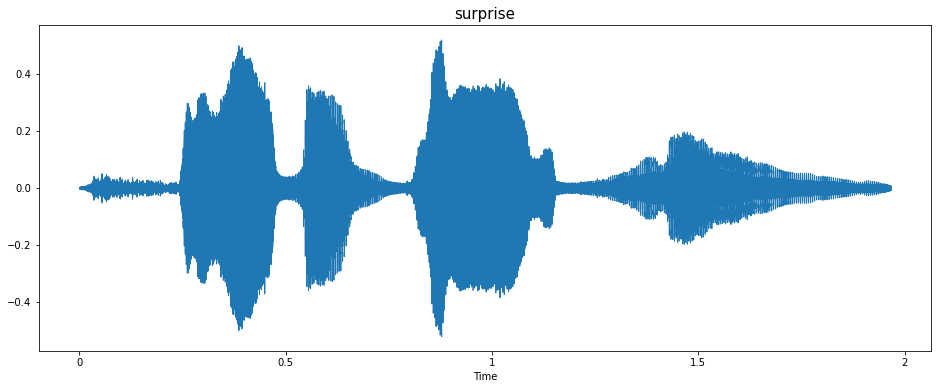

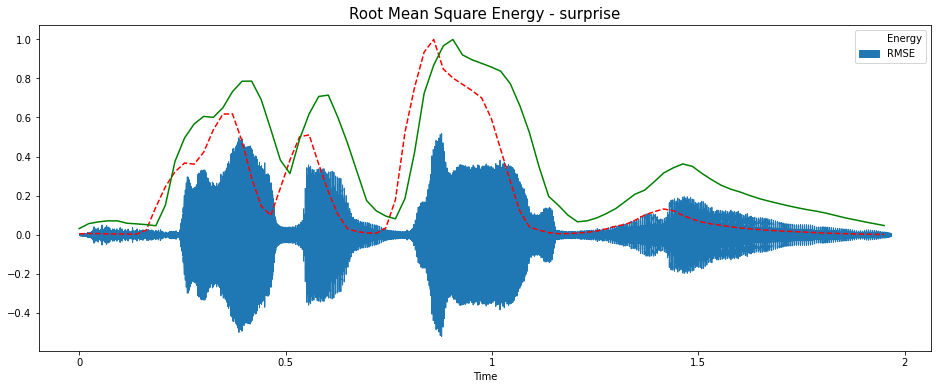

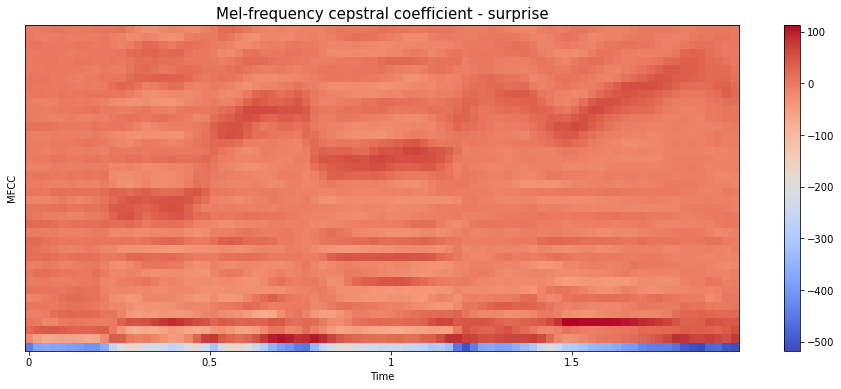

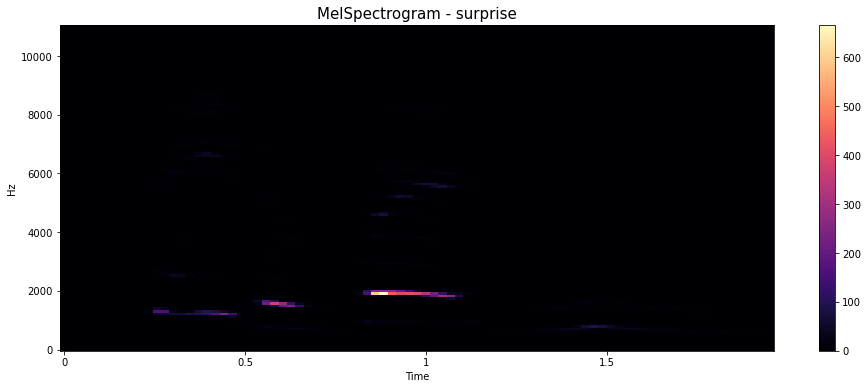

In [34]:
emotions, path = emos[4]
signal, sr = librosa.load(path)
ipd.display(ipd.Audio(data=signal, rate=sr))
create_waveplot(signal, sr, emotion)
create_rmse(signal, sr, emotion)
create_mfcc(signal, sr, emotion)
create_melspectrogram(signal, sr, emotion)

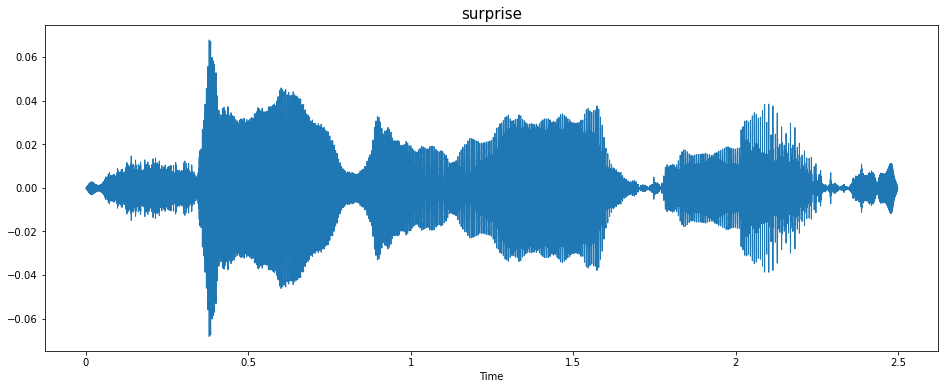

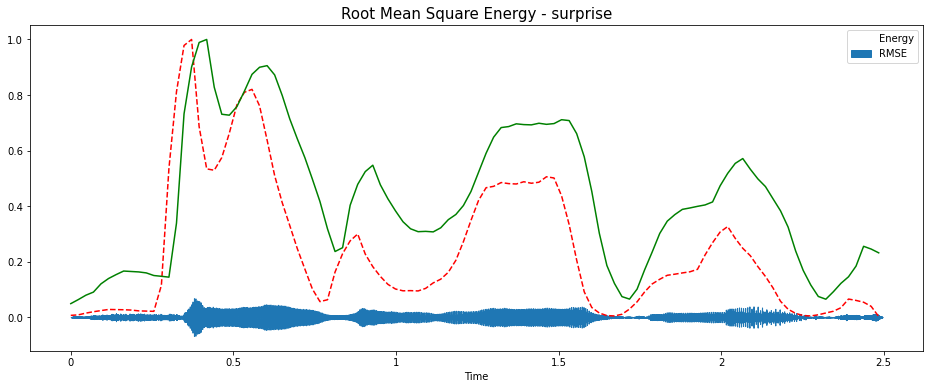

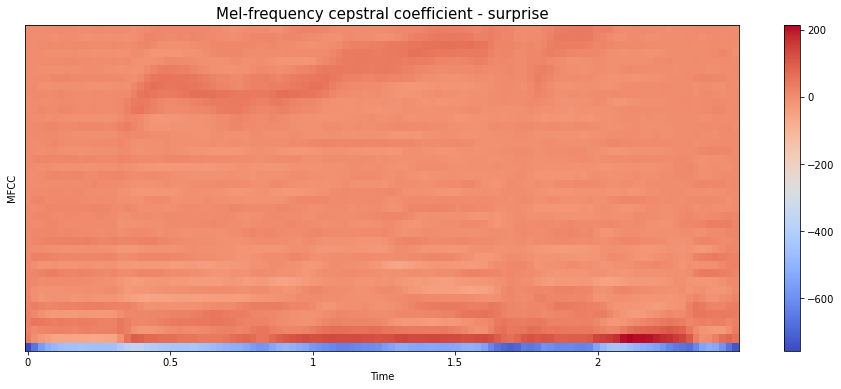

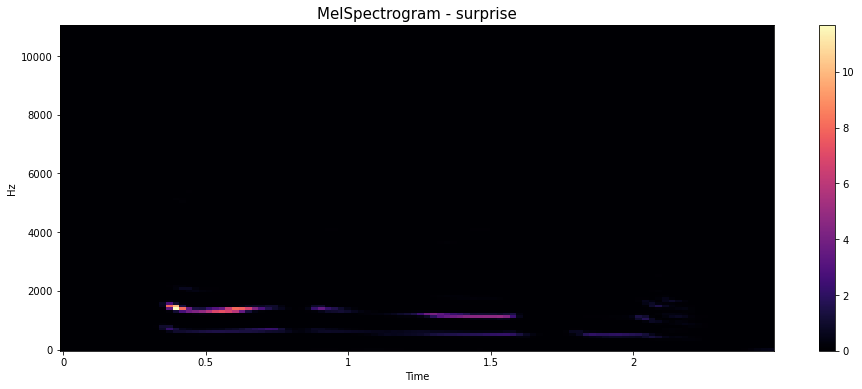

In [35]:
emotions, path = emos[5]
signal, sr = librosa.load(path,)
ipd.display(ipd.Audio(data=signal, rate=sr))
create_waveplot(signal, sr, emotion)
create_rmse(signal, sr, emotion)
create_mfcc(signal, sr, emotion)
create_melspectrogram(signal, sr, emotion)

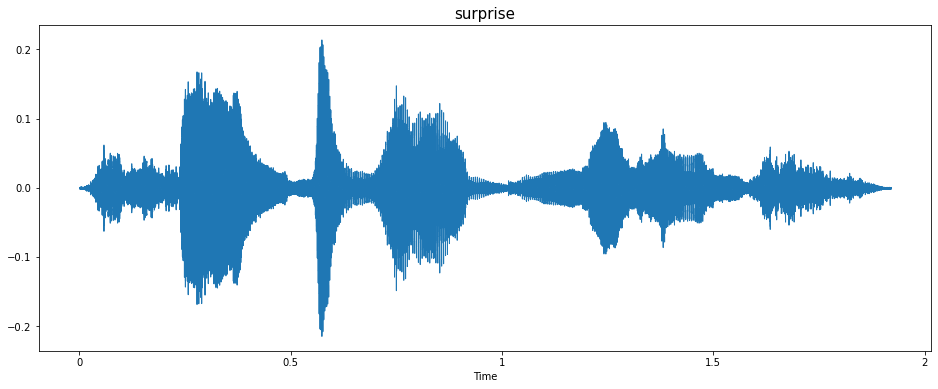

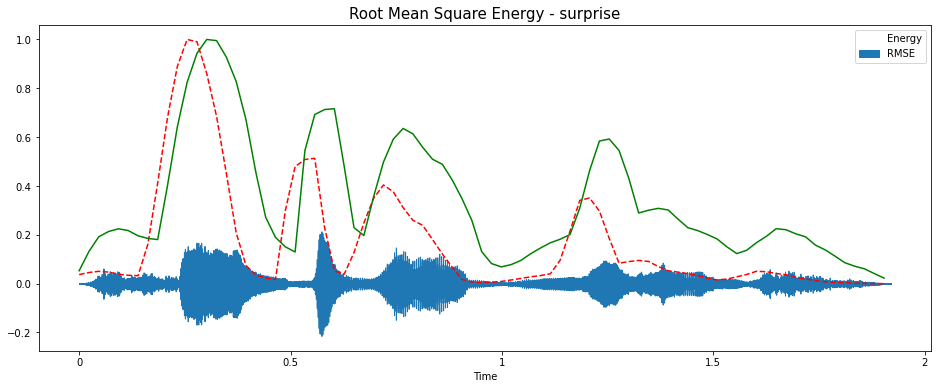

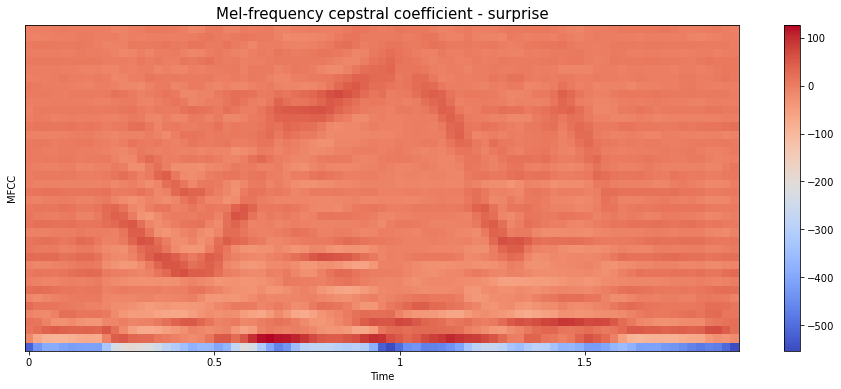

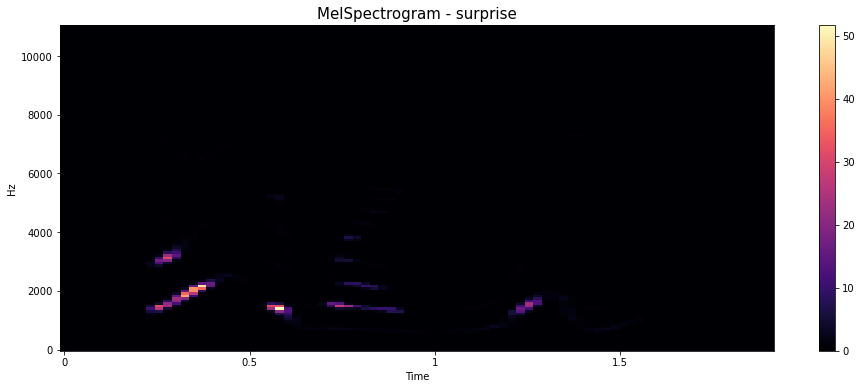

In [36]:
emotions, path = emos[6]
signal, sr = librosa.load(path,)
ipd.display(ipd.Audio(data=signal, rate=sr))
create_waveplot(signal, sr, emotion)
create_rmse(signal, sr, emotion)
create_mfcc(signal, sr, emotion)
create_melspectrogram(signal, sr, emotion)

In [37]:
def extract_features(audio, sr, frame_length=2048, hop_length=512):
    f1 = librosa.feature.rms(
        y=final_audio, frame_length=frame_length,
        hop_length=hop_length).T  # Energy - Root Mean Square

    f2 = librosa.feature.melspectrogram(y=final_audio,
                                        sr=sr,
                                        n_fft=frame_length,
                                        hop_length=hop_length).T

    f3 = librosa.feature.mfcc(y=final_audio,
                              sr=sr,
                              n_mfcc=40,
                              hop_length=hop_length).T  # MFCC

    # Filling the data lists
    return f1, f2, f3

In [38]:
# import time

tic = time.perf_counter()
scaler = StandardScaler()

# Initialize data lists
rms = []
mfcc = []
mel = []
labels = []
max_length = 121212  # 2.6 Seconds
frame_length = 2048
hop_length = 512

for path, label in dataset[['path', 'label']].to_numpy():

    # Fetch the sample rate.
    rawsound, sr = librosa.load(path=path)
    # Load the audio file.
    normalizedsound = librosa.util.normalize(rawsound)
    # Transform the normalized audio to np.array of samples.

    # Trim silence from the beginning and the end.
    trimmed_audio, index = librosa.effects.trim(y=normalizedsound, top_db=30)

    # Pad for duration equalization.
    if len(trimmed_audio) > max_length:
        trimmed_audio = trimmed_audio[0:max_length]
    final_audio = np.pad(trimmed_audio, (0, max_length - len(trimmed_audio)),
                         'constant')

    f1, f2, f3 = extract_features(final_audio, sr)
    rms.append(scaler.fit_transform(f1))
    mel.append(scaler.fit_transform(f2))
    mfcc.append(scaler.fit_transform(f3))
    labels.append(label)

    noise_audio = noise(trimmed_audio)
    if len(noise_audio) > max_length:
        noise_audio = noise_audio[0:max_length]
    noise_audio = np.pad(noise_audio, (0, max_length - len(noise_audio)),
                         'constant')
    n_f1, n_f2, n_f3 = extract_features(noise_audio, sr)
    rms.append(scaler.fit_transform(n_f1))
    mel.append(scaler.fit_transform(n_f2))
    mfcc.append(scaler.fit_transform(n_f3))
    labels.append(label)

f_rms = np.asarray(rms)
f_mfccs = np.asarray(mfcc)
f_mel = np.asarray(mel)

# Concatenating all features to 'X' variable.
X = np.concatenate((f_rms, f_mel, f_mfccs), axis=2)
# Preparing 'Y' as a 2D shaped variable.
Y = np.asarray(labels)
toc = time.perf_counter()
print(f"Running time: {(toc - tic)/60:0.4f} minutes")

Running time: 5.2078 minutes


In [39]:
print('RMS shape:', f_rms.shape)
print('MFCCs shape:', f_mfccs.shape)
print('mel shape:', f_mel.shape)

print('X shape:', X.shape)
print('Y shape:', Y.shape)

RMS shape: (8480, 237, 1)
MFCCs shape: (8480, 237, 40)
mel shape: (8480, 237, 128)
X shape: (8480, 237, 169)
Y shape: (8480,)


In [40]:
np.min(X), np.max(X)

(-7.934384, 14.859157)

# Model Training

In [41]:
from keras.models import Sequential
import tensorflow as tf
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers import Dropout
from keras.layers import LSTM, Dense

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
)

In [66]:
# Initializing the model

model = Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(X.shape[1:3])))
model.add(layers.LSTM(93))

# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

batch_size = 256

# Callbacks functions
checkpoint_path = 'Models/best_weights.hdf5'

# Save the best weights
mcp_save = callbacks.ModelCheckpoint(checkpoint_path,
                                     save_best_only=True,
                                     monitor='val_accuracy',
                                     mode='max')
# Reduce learning rate after 100 epoches without improvement.
rlrop = callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                    factor=0.005,
                                    patience=100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 237, 128)          152576    
                                                                 
 lstm_13 (LSTM)              (None, 93)                82584     
                                                                 
 dense_15 (Dense)            (None, 32)                3008      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 238,201
Trainable params: 238,201
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                      histogram_freq=1)

history = model.fit(X_train,
                    y_train,
                    epochs=160,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[mcp_save, rlrop, tensorboard_callback],
                    use_multiprocessing=True)
# Define the best weights to the model.
# model.load_weights(checkpoint_path)

Epoch 1/160


2022-07-31 11:35:41.161175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:35:41.626456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:35:42.127795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:35:42.586628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:35:43.315184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.8224

2022-07-31 11:35:52.165831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:35:52.362127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:35:52.895909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 15s 412ms/step - loss: 0.4096 - accuracy: 0.8224 - val_loss: 0.1565 - val_accuracy: 0.9599 - lr: 0.0010
Epoch 2/160
27/27 [==============================] - 7s 241ms/step - loss: 0.1409 - accuracy: 0.9578 - val_loss: 0.1000 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 3/160
27/27 [==============================] - 6s 224ms/step - loss: 0.0804 - accuracy: 0.9736 - val_loss: 0.0536 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 4/160
27/27 [==============================] - 6s 222ms/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0319 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 5/160
27/27 [==============================] - 6s 223ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0274 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 6/160
27/27 [==============================] - 6s 223ms/step - loss: 0.0220 - accuracy: 0.9941 - val_loss: 0.0484 - val_accuracy: 0.9817 - lr: 0.0010
Epoch 7/160
27/27 [==============================] - 6s 227ms/step - loss: 

KeyboardInterrupt: 

In [68]:
model = load_model('Models/best_weights.hdf5')
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['categorical_accuracy'])

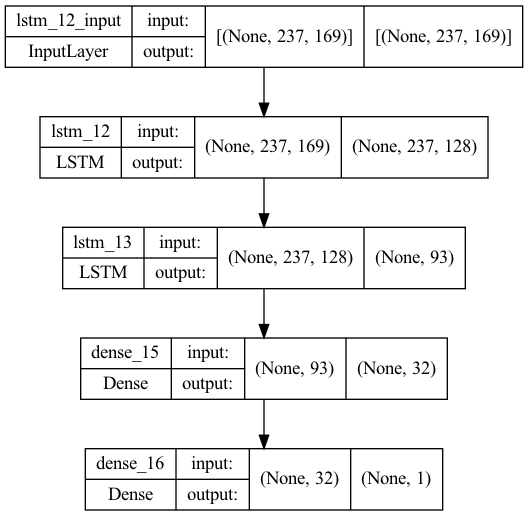

In [69]:
tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True)

In [70]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2022-07-31 11:42:33.852525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:42:33.944037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:42:34.283432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


53/53 - 4s - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - 4s/epoch - 75ms/step


In [71]:
plt.style.use('default')
plt.rc('figure', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

2022-07-31 11:42:42.370863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:42:42.439209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-31 11:42:42.748486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


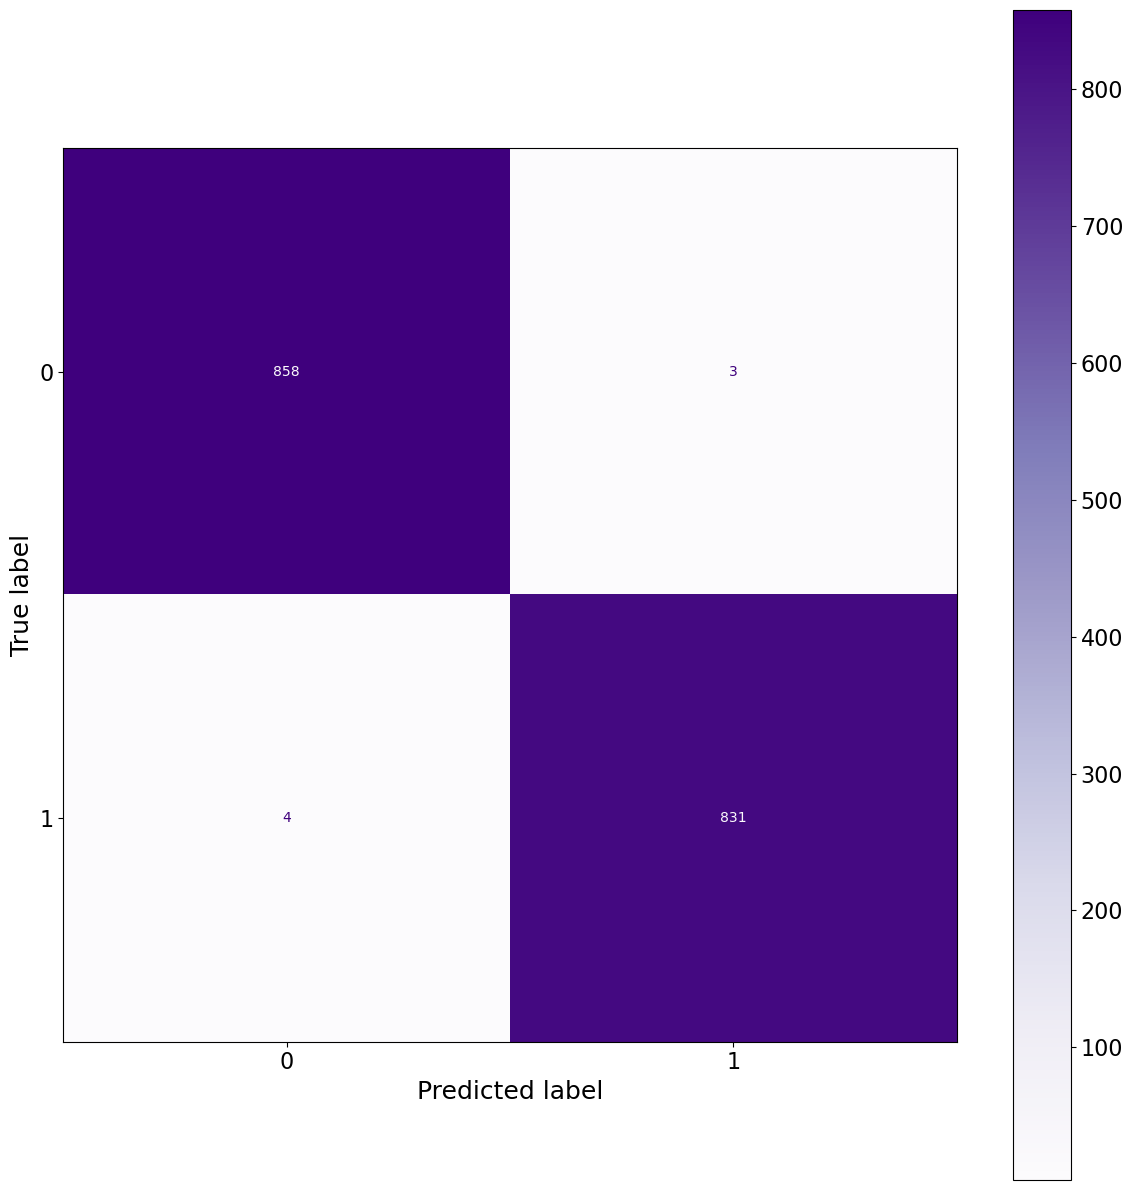

In [72]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(
    figsize=(12, 12),
    tight_layout=True,
)

disp.plot(cmap=plt.cm.Purples, ax=ax)
plt.savefig("Confusion_Matrix_Validation_Data.png", dpi=fig.dpi)
plt.show()

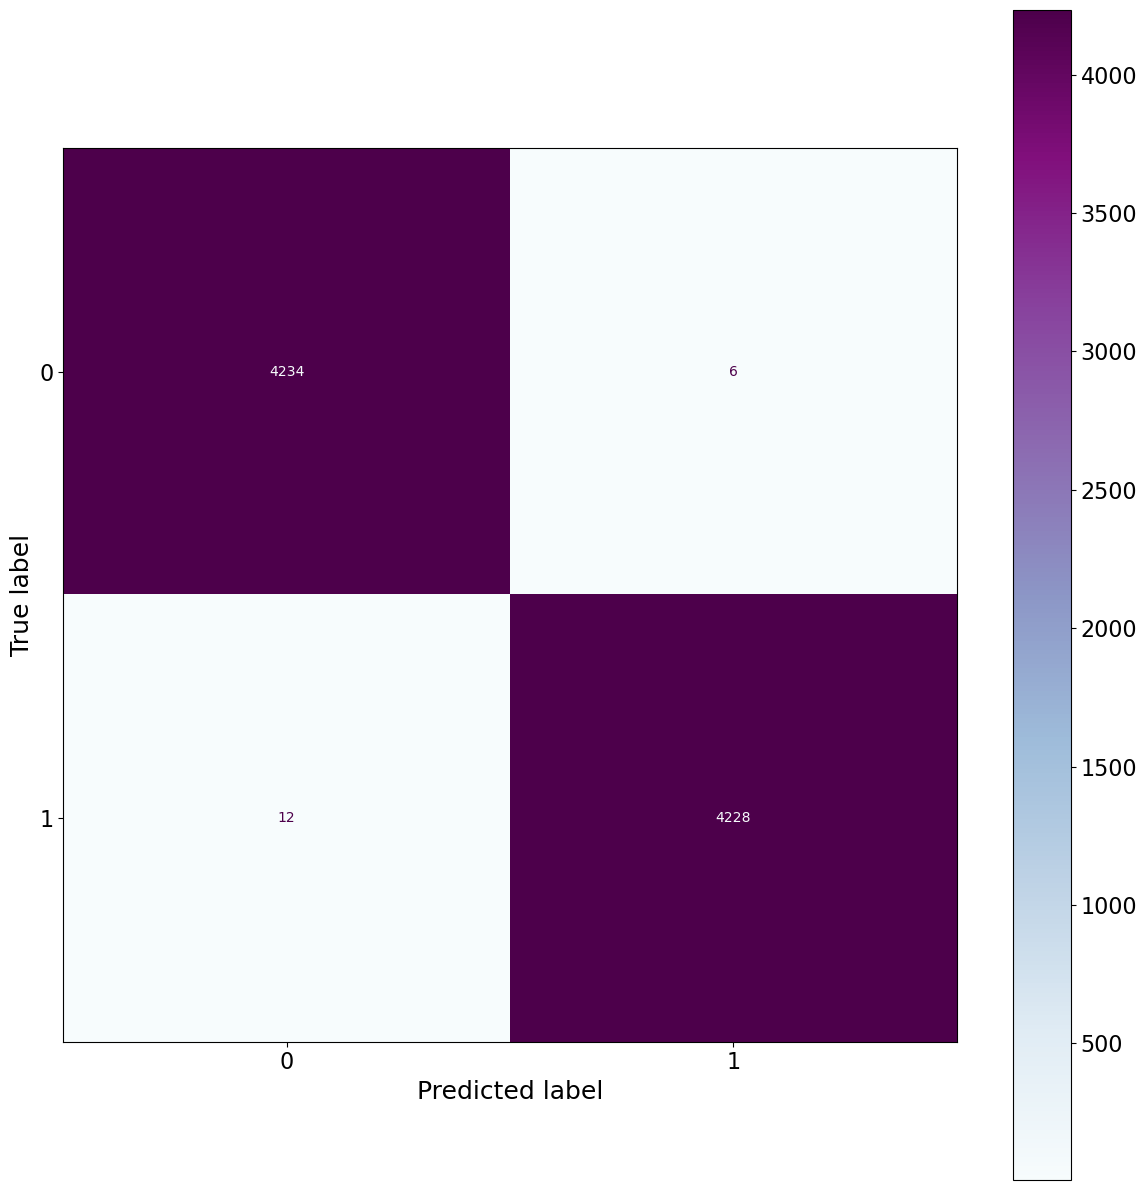

In [73]:
y_pred = model.predict(X)
cm = confusion_matrix(Y, y_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(12, 12), tight_layout=True)

disp.plot(cmap=plt.cm.BuPu, ax=ax)
plt.savefig("Confusion_Matrix_Base_Data.png", dpi=fig.dpi)
plt.show()